<a href="https://colab.research.google.com/github/Shaikmd3797/linear-model-for-some-datasets/blob/main/Linear_Regression_model_for_all_datas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Definition of Linear regression model*** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
def data_cleaning(data,target):
  data=data.drop_duplicates()
  data=data.dropna()
  features=[]
  for i in data.columns:
    if i != target:
      features.append(i) 
  for j in features:
    q1=data[j].quantile(0.25)  # 25 th quantile
    q3=data[j].quantile(0.75)  # 75 th quantile
    iqr= q3-q1  #iqr value
    upper= q3+1.5 * iqr
    lower = q1-1.5* iqr
    data[j]=data[j].clip(lower, upper) # the values are outliers which is out of range
  return data

In [3]:
def EDA(data,feature,target):
  for i in feature:
    sns.displot(data,x=i)
    sns.jointplot(x=i,y=target,data=data,kind='reg')
  plt.figure(figsize=(20, 10))
  sns.heatmap(data.corr().abs(),  annot=True)
  #sns.pairplot(data)

In [67]:
def linear_regression(data,feature,target):
  X=data.loc[:,feature]
  y=data.loc[:,target]
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1117)# spliting the data

  scaler=StandardScaler() #scaling the data  
  X_train_scale=scaler.fit_transform(X_train) # scaling is not mandatory for linear regression
  X_test_scale=scaler.transform(X_test)

  reg=LinearRegression() # linear model for the data
  reg.fit(X_train_scale, y_train)
  m=reg.coef_
  c=reg.intercept_
  y_predict=reg.predict(X_test_scale)
  print('coefficient,intersept :',m, 'and', c)
  print("R2 score is :",metrics.r2_score(y_test,y_predict)) # evaluation metric
  pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
  sns.jointplot(x=y_test,y=y_predict,data=pred,kind='reg')

In [71]:
def best_combination(data,X,target):
  import itertools
  combinations=[]
  R2_score=[]
  for i in range(len(X)+1):
    for j in itertools.combinations(X,i):
      combinations.append(j)
  for k in range(1,len(combinations)):
    X_comp=data.loc[:,combinations[k]]
    y_comp=data.loc[:,target]
    X_train,X_test,y_train,y_test=train_test_split(X_comp,y_comp,test_size=0.25,random_state=1117)
    scaler=StandardScaler()
    X_train_scale=scaler.fit_transform(X_train)
    X_test_scale=scaler.transform(X_test)
    reg=LinearRegression()
    reg.fit(X_train_scale,y_train)
    y_predict=reg.predict(X_test_scale)
    R2_score.append(metrics.r2_score(y_test,y_predict))
  for l in range(0,len(R2_score)):
    if R2_score[l]==max(R2_score):
      print("combinations of best features is", combinations[l+1] , 'R2 score of the combination is :',max(R2_score))
      break

# ***1) Linear Regression for boston data***

In [6]:
df=pd.read_csv("Boston.csv")
df


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
df=df.drop(['chas','rad'],axis=1)

In [8]:
df.describe()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df_clean=data_cleaning(df,'medv')

In [10]:
df_clean.describe()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.225032,6.963439,11.136779,0.554695,6.275312,68.574901,3.783947,408.237154,18.463834,381.918836,12.612011,22.532806
std,3.313353,12.028788,6.860353,0.115878,0.630242,28.148861,2.069765,168.537116,2.143924,19.054913,7.016829,9.197104
min,0.006320,0.000000,0.460000,0.385000,4.778500,2.900000,1.129600,187.000000,13.200000,344.106250,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.069639,31.250000,27.740000,0.871000,7.730500,100.000000,9.820800,711.000000,22.000000,396.900000,31.962500,50.000000


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   nox      506 non-null    float64
 4   rm       506 non-null    float64
 5   age      506 non-null    float64
 6   dis      506 non-null    float64
 7   tax      506 non-null    int64  
 8   ptratio  506 non-null    float64
 9   black    506 non-null    float64
 10  lstat    506 non-null    float64
 11  medv     506 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 51.4 KB


In [12]:
features=[]
for i in df_clean.columns:
  if i != 'medv':
    features.append(i)
features

['crim',
 'zn',
 'indus',
 'nox',
 'rm',
 'age',
 'dis',
 'tax',
 'ptratio',
 'black',
 'lstat']

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:1670: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
<ipython-input-3-ebd52cab51d3>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warn

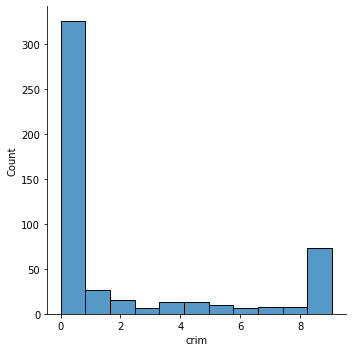

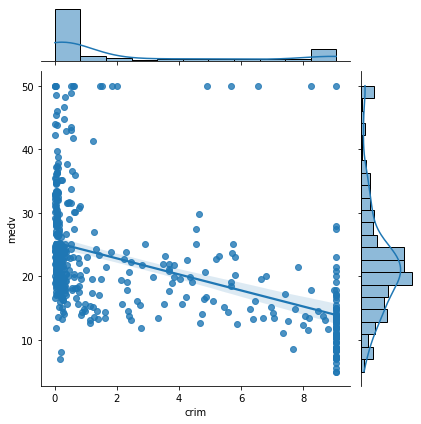

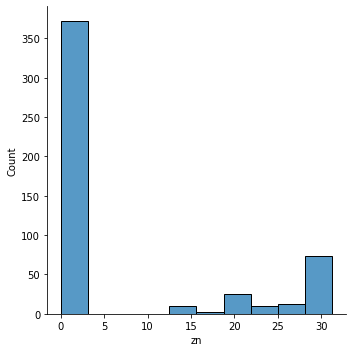

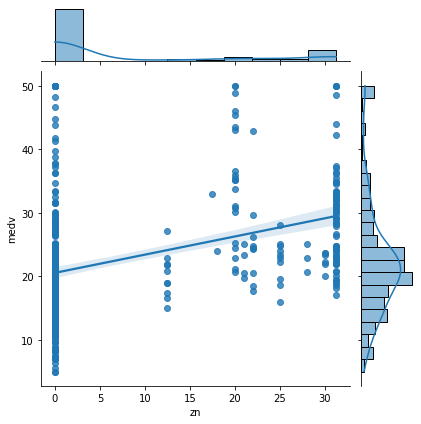

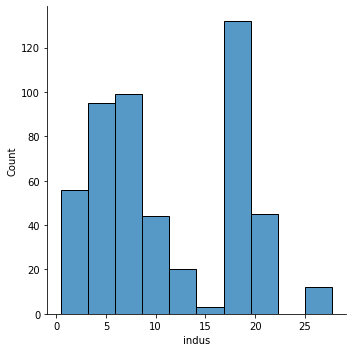

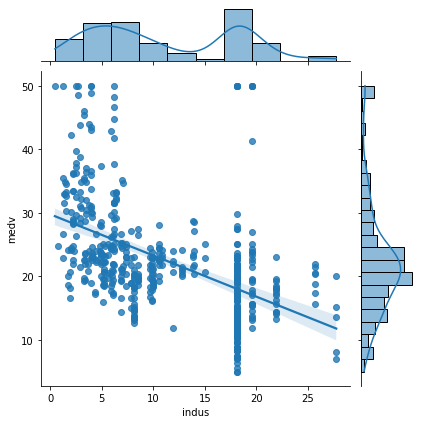

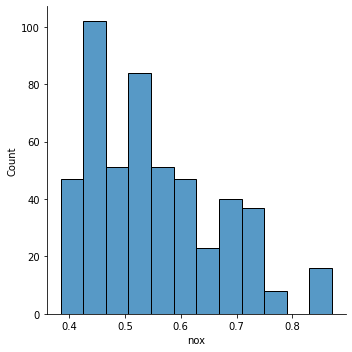

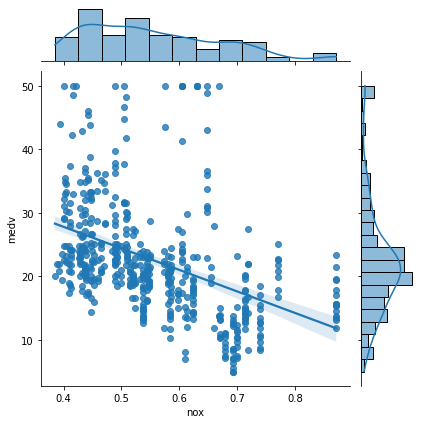

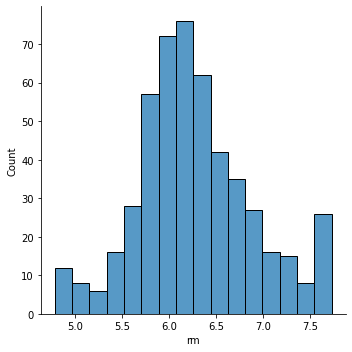

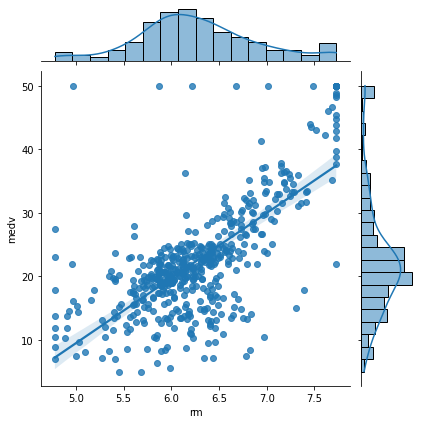

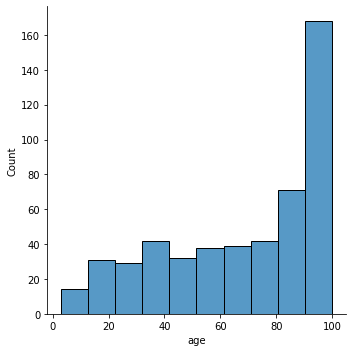

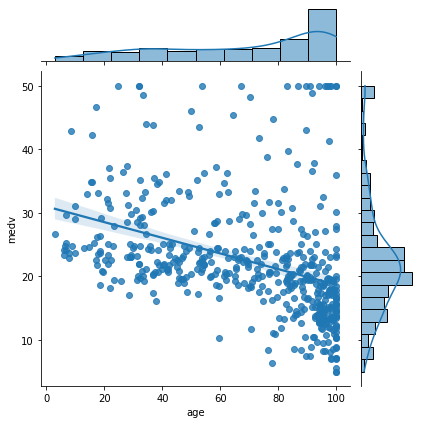

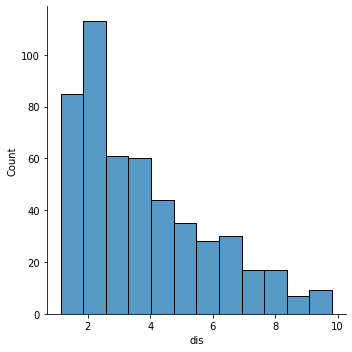

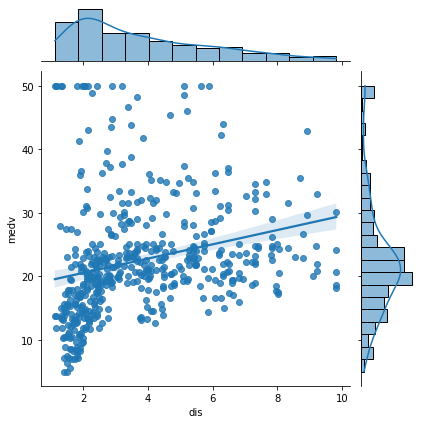

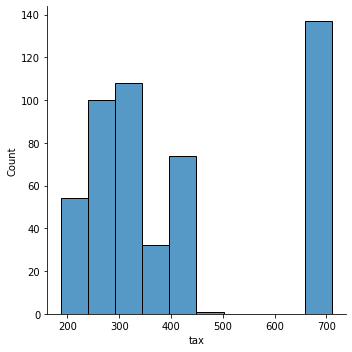

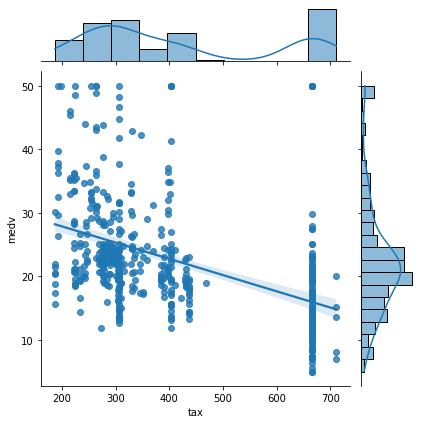

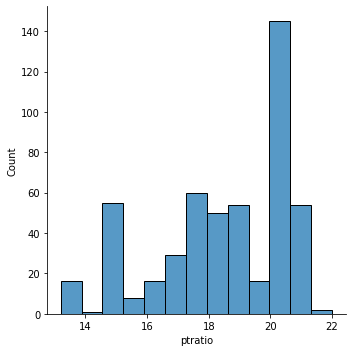

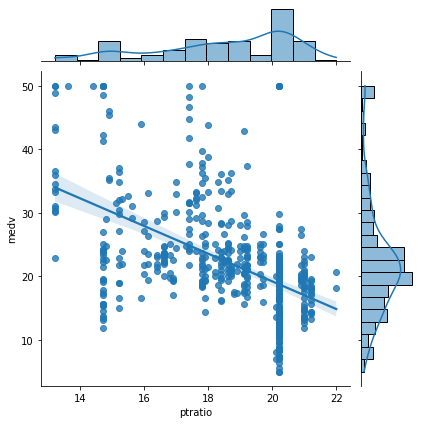

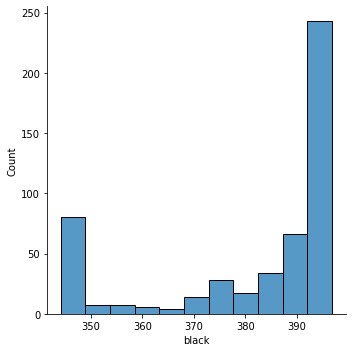

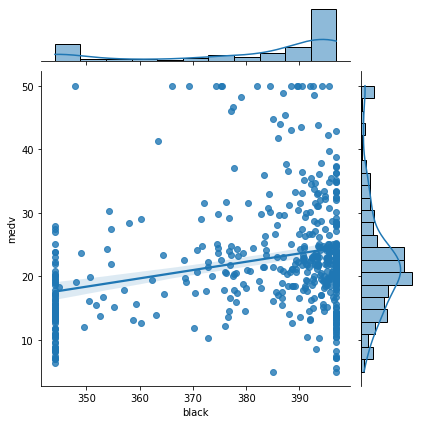

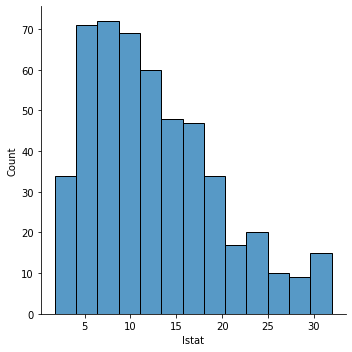

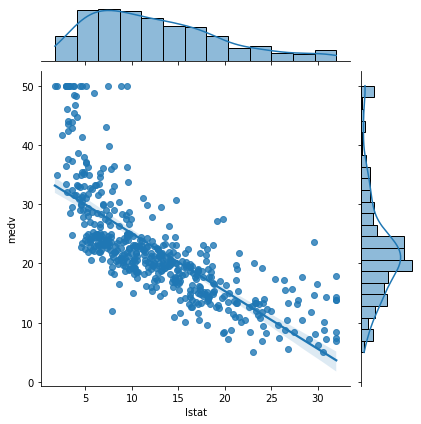

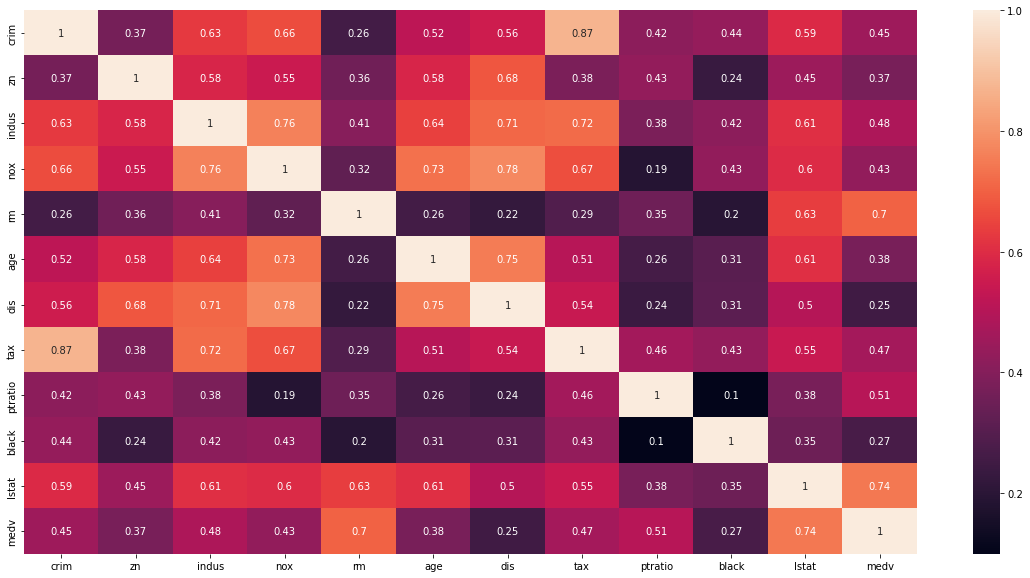

In [13]:
EDA(df_clean,features,'medv')

coefficient,intersept : [ 0.23361442  0.25618706 -0.12306279 -1.66653406  2.90599452  0.02620918
 -2.63222501 -0.55847907 -2.20018821  0.03654667 -4.20163017] and 22.618469656992076
R2 score is : 0.7068740166983037


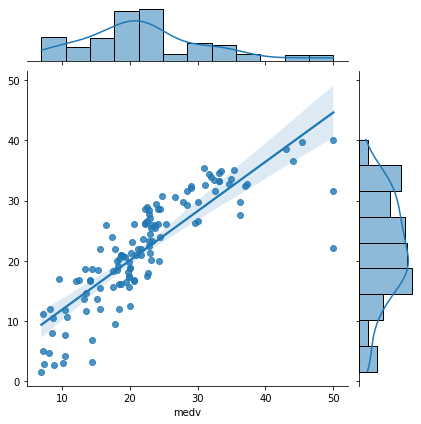

In [72]:
linear_regression(df_clean,features,'medv')

In [73]:
best_combination(df_clean,features,'medv')

combinations of best features is ('crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'black', 'lstat') R2 score of the combination is : 0.7075957267809293


In [80]:
from sklearn.linear_model import Ridge
X=df_clean.loc[:,['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'black', 'lstat']]
y=df_clean.loc[:,'medv']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1117)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


ridge_linear = Ridge()

ridge_linear.fit(X_train_scaled, y_train)
print("best combination of all features ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'black', 'lstat'] and R2 score of best combination is : ", ridge_linear.score(X_test_scaled, y_test))

best combination of all features ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'black', 'lstat'] and R2 score of best combination is :  0.7078319125752954


In [81]:
from sklearn.linear_model import Lasso
X=df_clean.loc[:,['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'black', 'lstat']]
y=df_clean.loc[:,'medv']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1117)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso_linear= Lasso()

lasso_linear.fit(X_train_scaled, y_train)
print("best combination of all features ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'black', 'lstat'] and R2 score of best combination is : ", lasso_linear.score(X_test_scaled, y_test))

best combination of all features ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'black', 'lstat'] and R2 score of best combination is :  0.6804602422727571


# **Finally, Ridge linear regression algorithm  gives best R2 score which is 0.70783**

# **Important features is ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'black', 'lstat'].**



# 2) ***Linear regression for Brain_Body data***

In [16]:
df2=pd.read_fwf('brain_body.txt')

In [17]:
df2.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [18]:
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [19]:
df2_clean=df2

In [20]:
df2_clean.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [21]:
features2=[]
for i in df2_clean.columns:
  if i != 'Body':
    features2.append(i)
features2

['Brain']

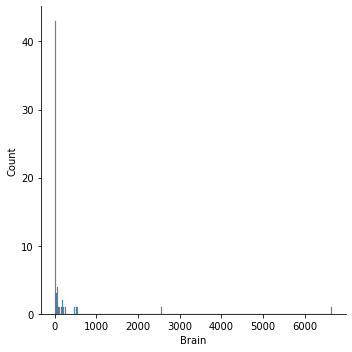

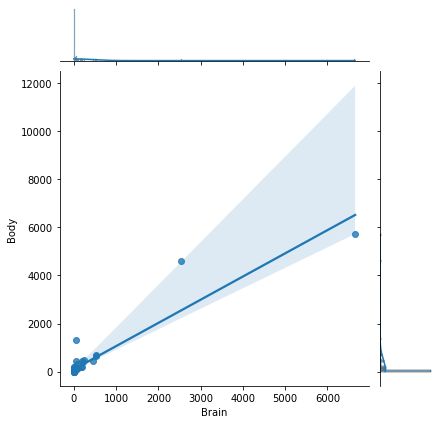

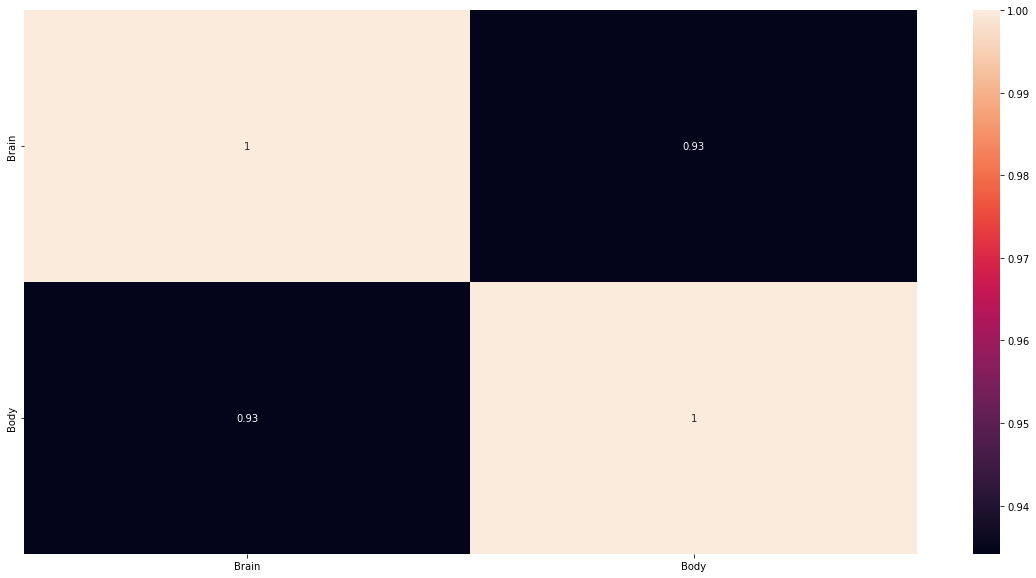

In [22]:
EDA(df2_clean,features2,'Body')

coefficient,intersept : [987.34684936] and 354.73304347826087
R2 score is : 0.6324391816478234


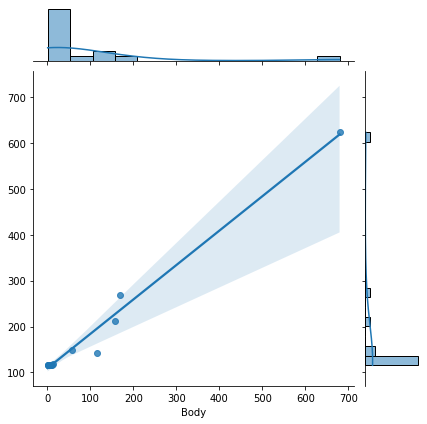

In [23]:
linear_regression(df2_clean,features2,'Body')

# ***3) Linear regression for car data***

In [24]:
df3=pd.read_csv('car_data.csv')

In [25]:
df3.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [26]:
df3.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [27]:
cont_col=['Mileage','Price']

In [28]:
df3_cont=df3.drop(['Make','Model','Trim','Type','Cylinder','Liter','Doors','Cruise','Sound','Leather'],axis=1)

In [29]:
df3_clean=data_cleaning(df3_cont,'Price')

In [30]:
df3_clean.describe()

,Price,Mileage
count,804.000000,804.000000
mean,21343.143767,19807.086132
std,9884.852801,8119.836852
min,8638.930895,266.000000
25%,14273.073870,14623.500000
50%,18024.995019,20913.500000
75%,26717.316636,25213.000000
max,70755.466717,41097.250000


In [31]:
features3=[]
for i in df3_clean.columns:
  if i != 'Price':
    features3.append(i)
features3

['Mileage']

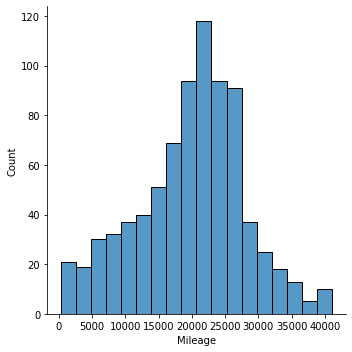

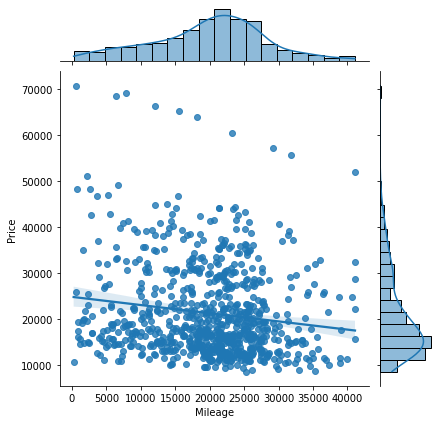

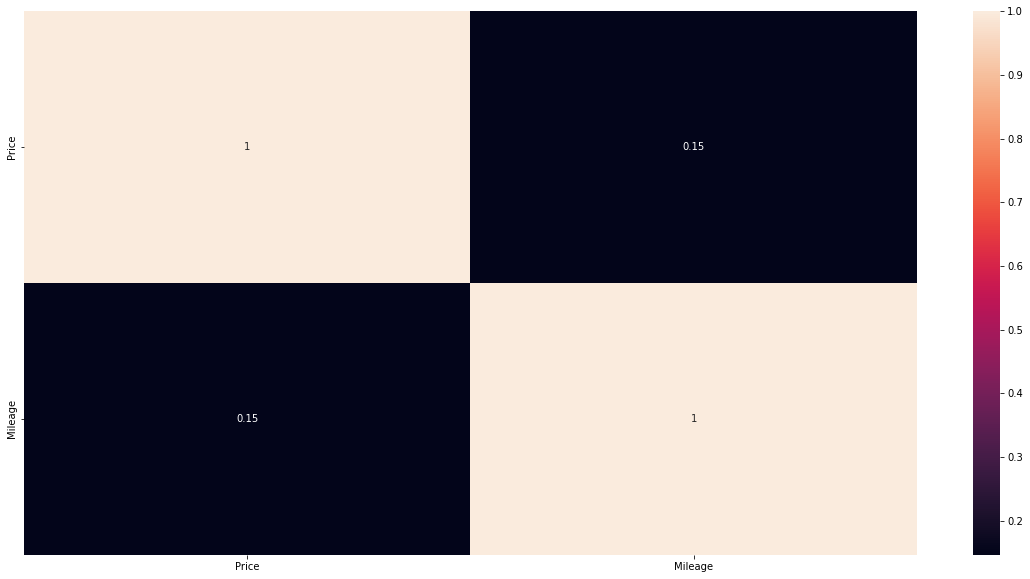

In [32]:
EDA(df3_clean,features3,'Price')

coefficient,intersept : [-1633.20062076] and 21366.945609906186
R2 score is : 0.0011987692520066817


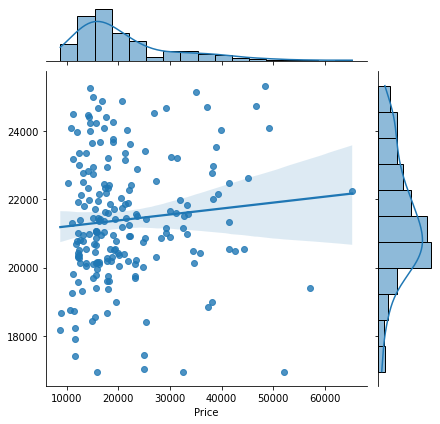

In [33]:
linear_regression(df3_clean,features3,'Price')

In [34]:
features3=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']

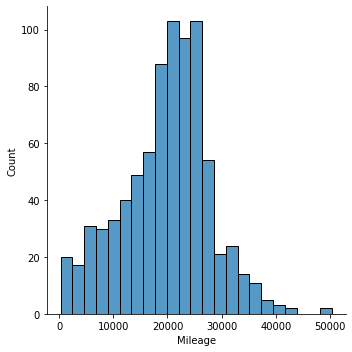

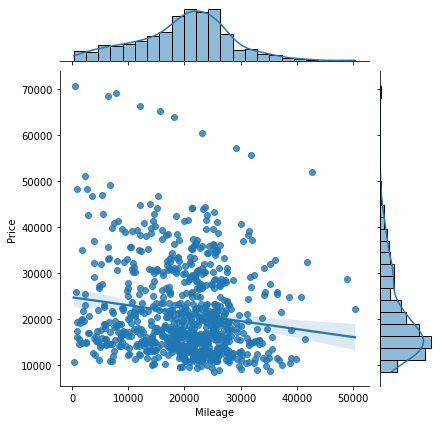

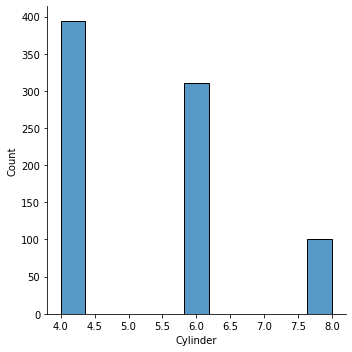

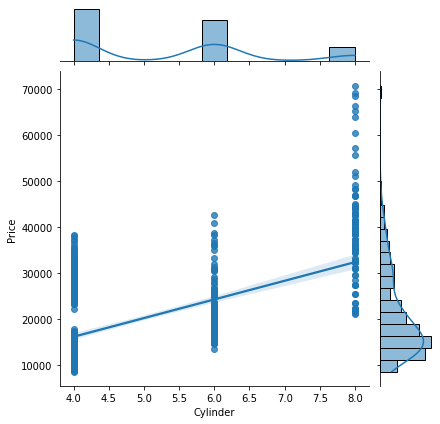

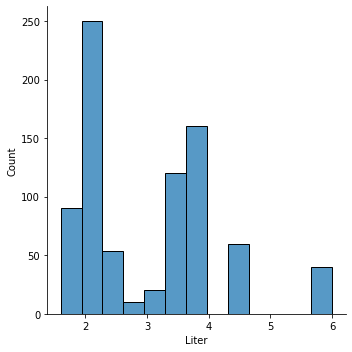

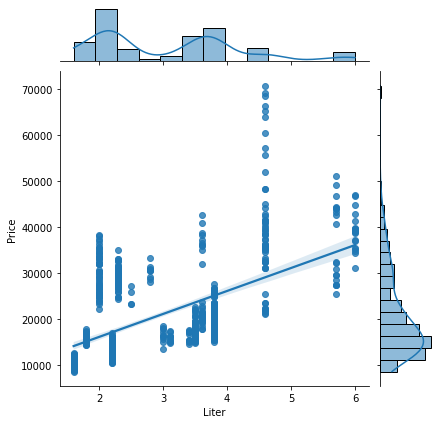

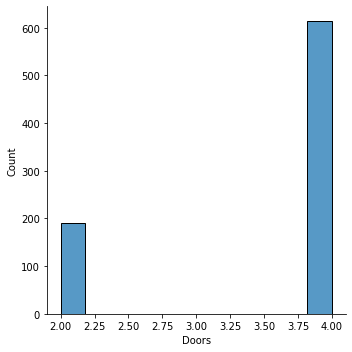

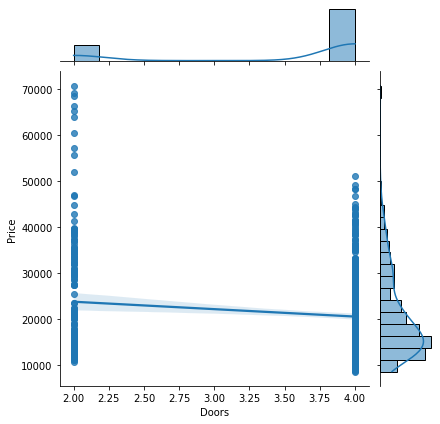

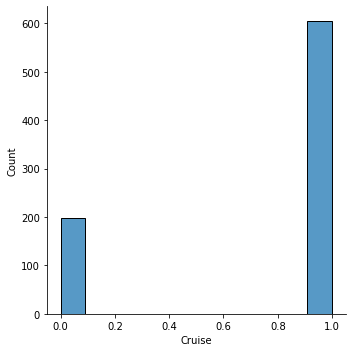

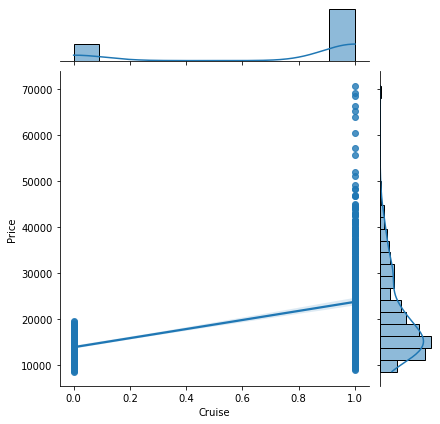

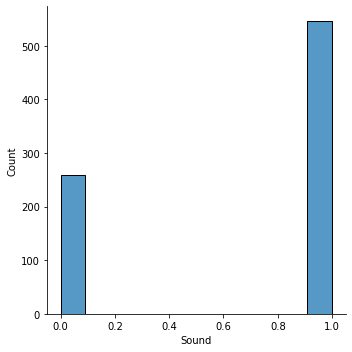

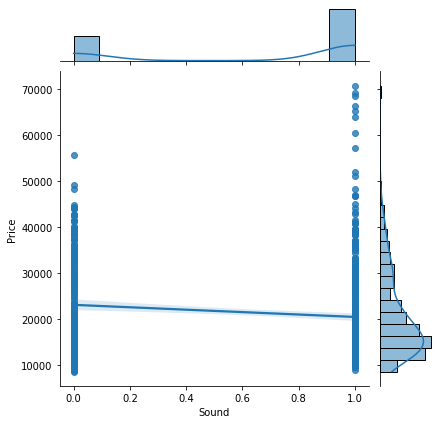

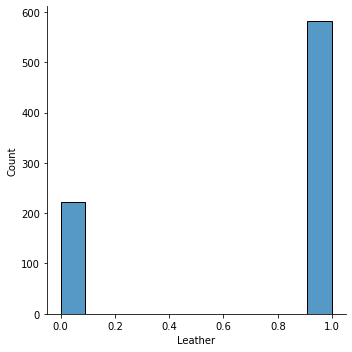

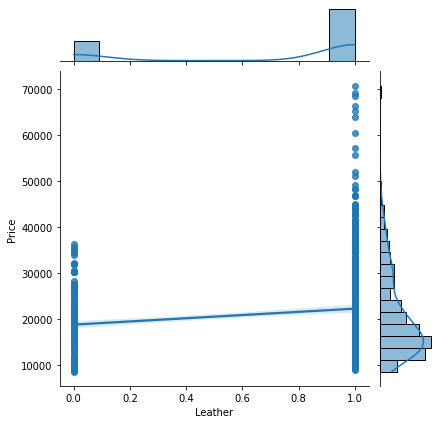

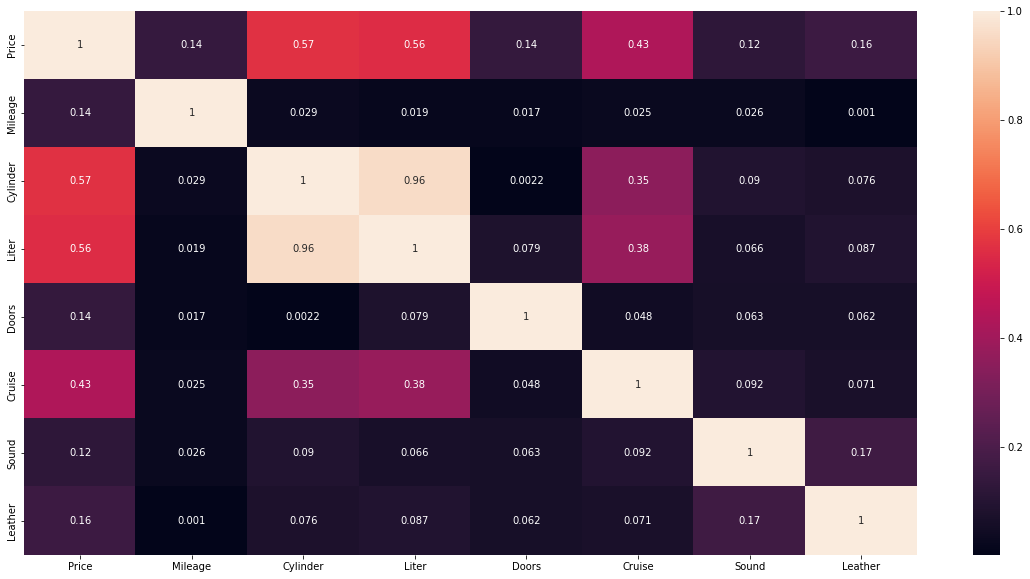

In [35]:
EDA(df3,features3,'Price')

coefficient,intersept : [-1505.23105908  4735.52753645  -411.28283971 -1278.43062463
  2746.67364601  -825.33170686  1341.5848631 ] and 21366.945609906186
R2 score is : 0.4624641781258745


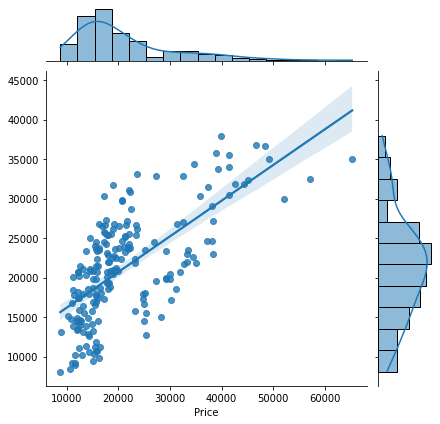

In [36]:
linear_regression(df3,features3,'Price')

In [37]:
best_combination(df3,features3,'Price')

0.47124578057796473
combinations of best features is ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather') R2 score of the combination is : 0.47124578057796473


# ***4) linear model for salary data***

In [38]:
df4=pd.read_fwf('salary.txt',header=None, 
                 names=['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'])
df4

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [39]:
df4.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [40]:
df4_clean=data_cleaning(df4,'Salary')
df4_clean.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.442308,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.388490,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,23.000000,1.000000,35.000000,38045.000000


In [41]:
features4=[]
for i in df4_clean.columns:
  if i != 'Salary':
    features4.append(i)
features4

['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

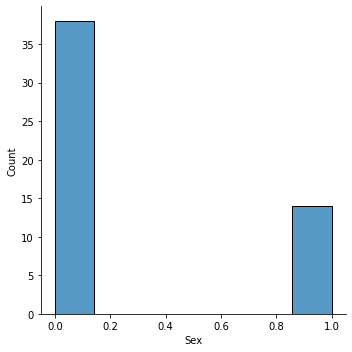

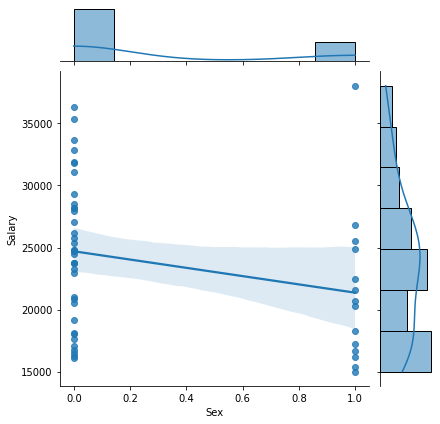

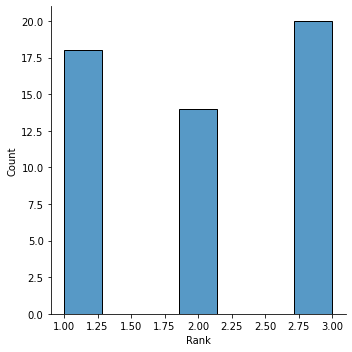

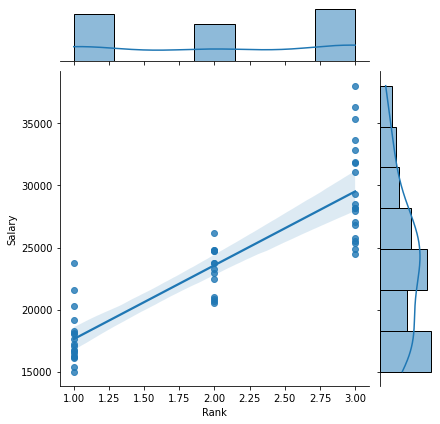

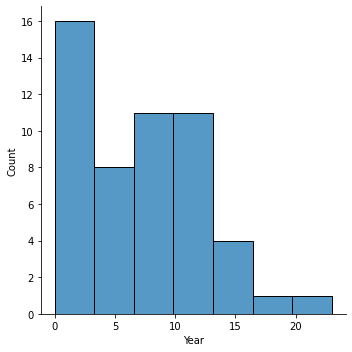

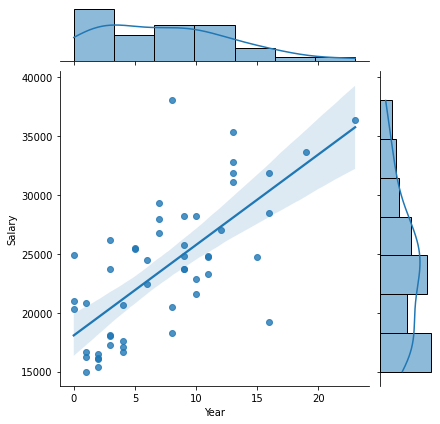

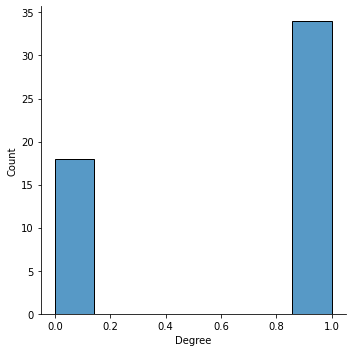

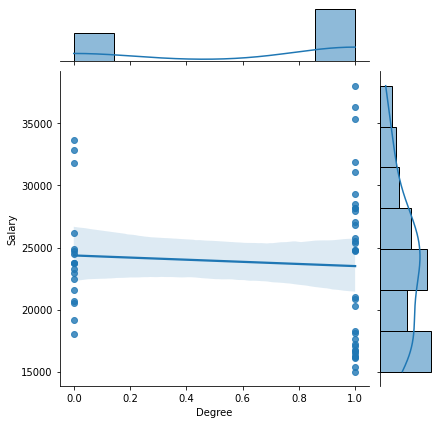

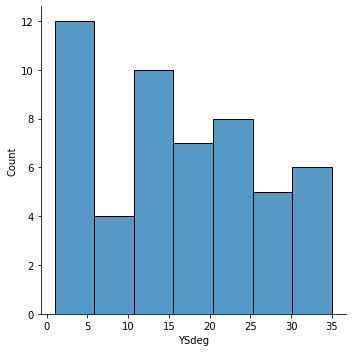

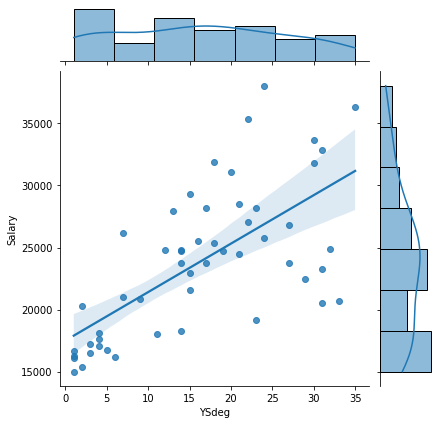

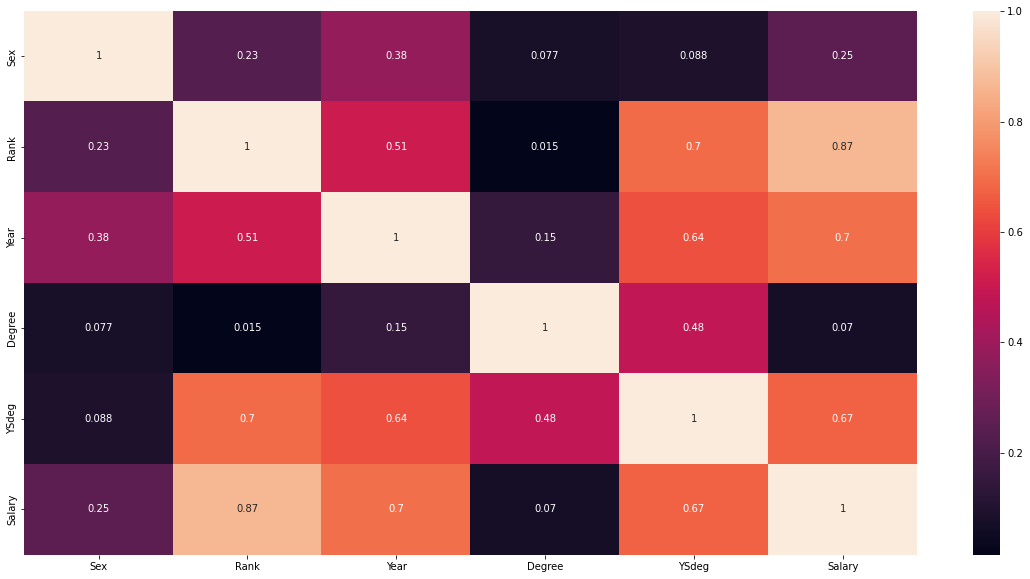

In [42]:
EDA(df4_clean,features4,'Salary')

coefficient,intersept : [  743.25177358  4547.29006546  3165.37117319  -664.85999966
 -1747.74709262] and 24291.30769230769
R2 score is : 0.8397574453874874


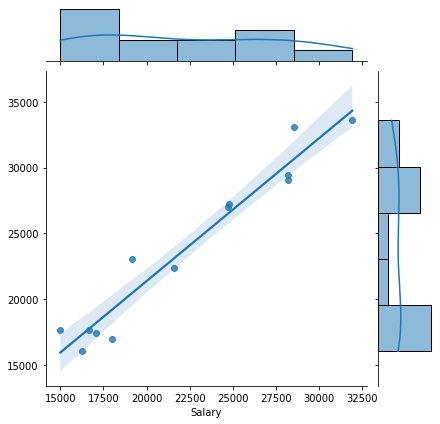

In [43]:
linear_regression(df4_clean,features4,'Salary')

In [44]:
best_combination(df4_clean,features4,'Salary')

0.9181156762738585
combinations of best features is ('Rank', 'Year', 'YSdeg') R2 score of the combination is : 0.9181156762738585


# ***5) linear model for cricket chirp and ground temprature***

In [45]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df5 = pd.DataFrame(ground_cricket_data,columns=("Ground Temperature","Chirps/Second"))
df5

,Ground Temperature,Chirps/Second
0,88.6,20.0
1,71.6,16.0
2,93.3,19.8
3,84.3,18.4
4,80.6,17.1
5,75.2,15.5
6,69.7,14.7
7,71.6,15.7
8,69.4,15.4
9,83.3,16.3


In [46]:
df5.describe()

,Ground Temperature,Chirps/Second
count,15.000000,15.000000
mean,79.346667,16.566667
std,7.020467,1.712837
min,69.400000,14.400000
25%,73.400000,15.450000
50%,80.600000,16.000000
75%,83.400000,17.150000
max,93.300000,20.000000


In [47]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ground Temperature  15 non-null     float64
 1   Chirps/Second       15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [48]:
df5_clean=data_cleaning(df5,'Chirps/Second')
df5_clean.describe()

,Ground Temperature,Chirps/Second
count,15.000000,15.000000
mean,79.346667,16.566667
std,7.020467,1.712837
min,69.400000,14.400000
25%,73.400000,15.450000
50%,80.600000,16.000000
75%,83.400000,17.150000
max,93.300000,20.000000


In [49]:
features5=[]
for i in df5_clean.columns:
  if i != 'Chirps/Second':
    features5.append(i)
features5

['Ground Temperature']

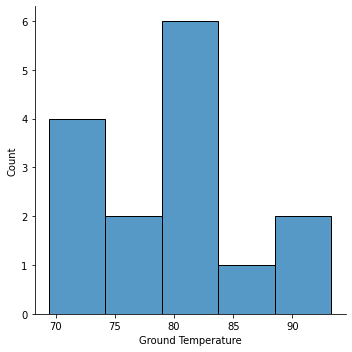

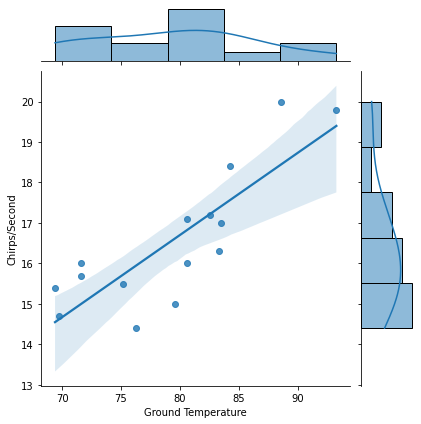

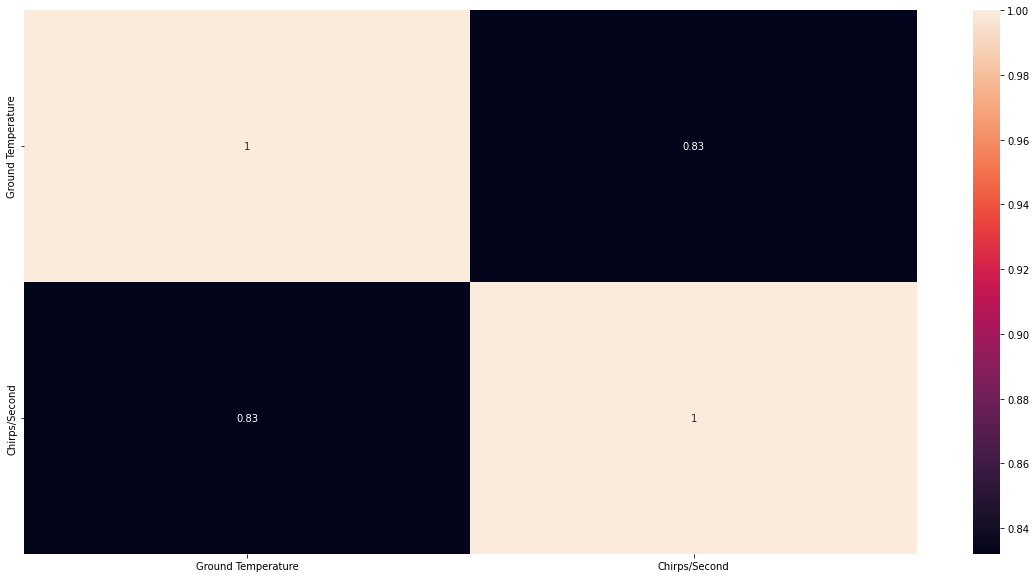

In [50]:
EDA(df5_clean,features5,'Chirps/Second')

coefficient,intersept : [1.1696094] and 16.363636363636363
R2 score is : 0.7782312006395539


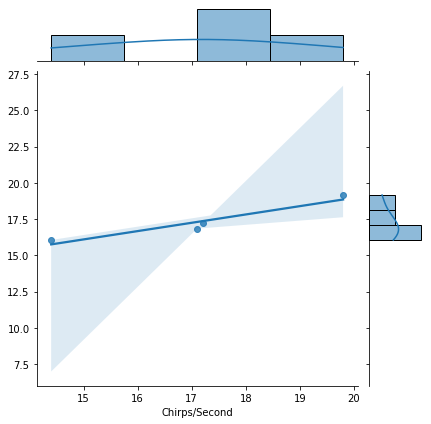

In [51]:
linear_regression(df5_clean,features5,'Chirps/Second')